In [1]:
import pandas as pd

# Reading the files
underweight_df = pd.read_csv('share-of-children-underweight.csv')
stunting_df = pd.read_csv('share-of-children-younger-than-5-who-suffer-from-stunting.csv')

# Displaying the first few rows of each dataframe
underweight_df_head = underweight_df.head()
stunting_df_head = stunting_df.head()

underweight_df_head, stunting_df_head


(        Entity Code  Year  \
 0  Afghanistan  AFG  1997   
 1  Afghanistan  AFG  2004   
 2  Afghanistan  AFG  2013   
 3  Afghanistan  AFG  2018   
 4      Albania  ALB  1997   
 
    Prevalence of underweight, weight for age (% of children under 5)  
 0                                          44.900002                  
 1                                          32.900002                  
 2                                          24.600000                  
 3                                          19.100000                  
 4                                           7.100000                  ,
         Entity Code  Year  \
 0  Afghanistan  AFG  1997   
 1  Afghanistan  AFG  2004   
 2  Afghanistan  AFG  2013   
 3  Afghanistan  AFG  2018   
 4      Albania  ALB  1997   
 
    Prevalence of stunting, height for age (% of children under 5)  
 0                                          53.200001               
 1                                          59.299999            

In [2]:
# Merging the datasets on 'Entity', 'Code', and 'Year'
merged_df = pd.merge(underweight_df, stunting_df, on=['Entity', 'Code', 'Year'], how='inner')

# Renaming columns for clarity and consistency
merged_df.columns = ['country', 'code', 'year', 'percent_underweight', 'percent_stunting']

# Displaying the first few rows of the merged dataframe to confirm the merge was successful
merged_df.head()


,country,code,year,percent_underweight,percent_stunting
0,Afghanistan,AFG,1997,44.900002,53.200001
1,Afghanistan,AFG,2004,32.900002,59.299999
2,Afghanistan,AFG,2013,24.600000,40.400002
3,Afghanistan,AFG,2018,19.100000,38.200001
4,Albania,ALB,1997,7.100000,20.400000


<ipython-input-3-cb453448d8c0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_trends = merged_df.groupby('year').mean().reset_index()


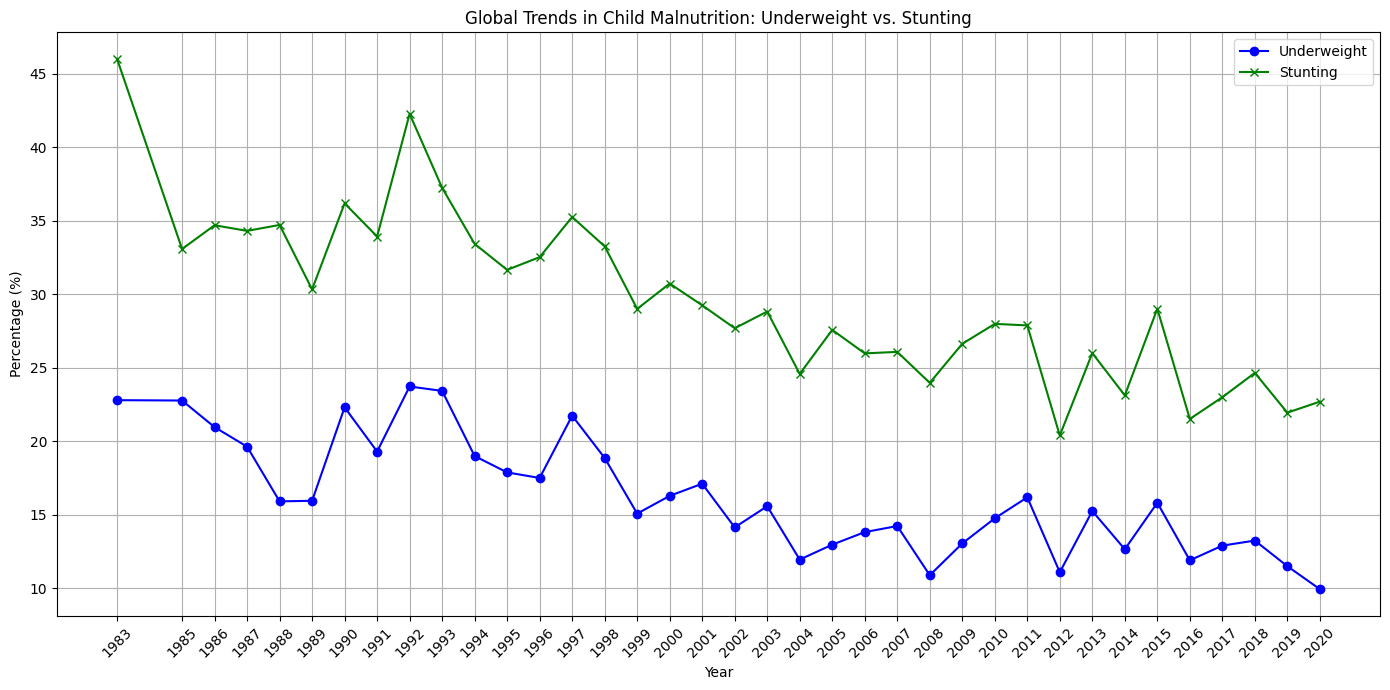

In [3]:
# Global trends: Calculating the global average of underweight and stunting percentages over time
global_trends = merged_df.groupby('year').mean().reset_index()
import matplotlib.pyplot as plt

# Plotting the global trends
plt.figure(figsize=(14, 7))
plt.plot(global_trends['year'], global_trends['percent_underweight'], label='Underweight', marker='o', linestyle='-', color='blue')
plt.plot(global_trends['year'], global_trends['percent_stunting'], label='Stunting', marker='x', linestyle='-', color='green')
plt.title('Global Trends in Child Malnutrition: Underweight vs. Stunting')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.xticks(global_trends['year'], rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


The graph illustrates the global trends in child malnutrition, comparing the prevalence of underweight and stunting among children under 5 across different years. Both indicators show a downward trend over time, indicating a global improvement in child nutritional status. However, the rates of decline and the levels of underweight and stunting vary, suggesting that different factors may influence these two forms of malnutrition.

This visualization helps highlight the progress made in reducing child malnutrition globally while also underscoring the need for continued efforts to address these issues comprehensively. The different rates of decline for underweight and stunting suggest that interventions may need to be tailored to address specific forms of malnutrition more effectively.

<ipython-input-4-e6eeff2d9b15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['disparity'] = abs(recent_data['percent_underweight'] - recent_data['percent_stunting'])


(       country  percent_underweight  percent_stunting  disparity
 681     Rwanda                  7.7         33.099998  25.399999
 594    Nigeria                 18.4         31.500000  13.100000
 625  Palestine                  2.1          8.700000   6.600000
 276     Gambia                 11.6         17.500000   5.900000,
        country  percent_underweight  percent_stunting
 625  Palestine                  2.1          8.700000
 681     Rwanda                  7.7         33.099998
 276     Gambia                 11.6         17.500000
 594    Nigeria                 18.4         31.500000)

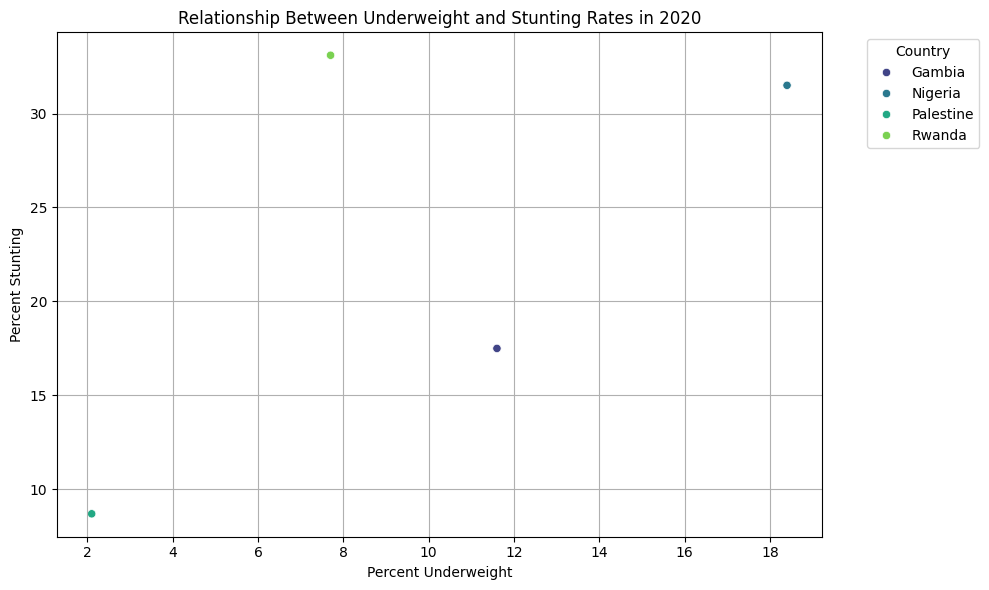

In [4]:
import seaborn as sns
# Selecting the most recent year available in the dataset
most_recent_year = merged_df['year'].max()

# Filtering the dataset for the most recent year
recent_data = merged_df[merged_df['year'] == most_recent_year]

# Identifying countries with the highest disparities between underweight and stunting rates
recent_data['disparity'] = abs(recent_data['percent_underweight'] - recent_data['percent_stunting'])
high_disparity_countries = recent_data.nlargest(5, 'disparity')[['country', 'percent_underweight', 'percent_stunting', 'disparity']]

# Identifying countries with the lowest rates of both underweight and stunting
low_rates_countries = recent_data.nsmallest(5, ['percent_underweight', 'percent_stunting'])[['country', 'percent_underweight', 'percent_stunting']]

# Visualizing the relationship between underweight and stunting rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percent_underweight', y='percent_stunting', hue='country', data=recent_data, palette='viridis')
plt.title(f'Relationship Between Underweight and Stunting Rates in {most_recent_year}')
plt.xlabel('Percent Underweight')
plt.ylabel('Percent Stunting')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

high_disparity_countries, low_rates_countries


Detailed Comparative Analysis Results
For the most recent year available in the dataset, we've identified:

Countries with High Disparities between underweight and stunting rates. This highlights areas where targeted interventions might be particularly effective by focusing on the specific form of malnutrition that is more prevalent.
Rwanda shows a significant disparity, with a much higher rate of stunting (33.1%) compared to underweight (7.7%), suggesting that interventions focusing on improving child growth could be particularly beneficial.
Nigeria and Gambia also show notable disparities, indicating areas for targeted nutritional or health interventions.
Countries with Low Rates of both underweight and stunting, which may indicate successful strategies in addressing child malnutrition.
Palestine stands out with particularly low rates of underweight (2.1%) and stunting (8.7%), suggesting effective nutritional programs or health interventions.
Visualization Insights
The scatter plot visualizing the relationship between underweight and stunting rates in the most recent year across countries shows that while there is some degree of correlation between the two indicators (as expected), there are also significant variations. Some countries manage to keep both rates low, indicating successful health and nutrition interventions, while others show disparities, indicating areas for targeted improvement.

These findings can guide policy and intervention strategies, suggesting that focusing on specific forms of malnutrition based on the prevalent needs of each country or region could enhance the effectiveness of health and nutrition programs.



In [5]:
# Calculating the average of underweight and stunting rates for each country in the most recent year
recent_data['average_malnutrition'] = (recent_data['percent_underweight'] + recent_data['percent_stunting']) / 2

# Identifying the countries with the highest average malnutrition rates
countries_highest_need = recent_data.nlargest(5, 'average_malnutrition')[['country', 'percent_underweight', 'percent_stunting', 'average_malnutrition']]

countries_highest_need


<ipython-input-5-1c8889589163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_data['average_malnutrition'] = (recent_data['percent_underweight'] + recent_data['percent_stunting']) / 2


,country,percent_underweight,percent_stunting,average_malnutrition
594,Nigeria,18.4,31.500000,24.950000
681,Rwanda,7.7,33.099998,20.399999
276,Gambia,11.6,17.500000,14.550000
625,Palestine,2.1,8.700000,5.400000


Countries in Highest Need of Nutritional Interventions
Based on the average of underweight and stunting rates for the most recent year available, the countries with the highest overall malnutrition rates, and thus potentially in the highest need of nutritional interventions, are:

Nigeria with an average malnutrition rate of approximately 24.95%. Nigeria shows significant challenges with both underweight and stunting indicators, highlighting a critical need for comprehensive nutritional and health interventions.
Rwanda follows with an average rate of 20.4%. Despite a lower underweight rate, the high stunting rate in Rwanda indicates persistent challenges in child growth and nutrition that require targeted interventions.
Gambia has an average malnutrition rate of 14.55%, showing moderate levels of both underweight and stunting. Efforts to improve nutritional access and health care could have a significant impact here.
Palestine, with a lower average malnutrition rate of 5.4%, still shows room for improvement, especially in reducing stunting rates further.
These findings underscore the importance of focusing on countries like Nigeria and Rwanda, where the burden of child malnutrition is particularly high. Targeted interventions in these areas could include improving food security, enhancing maternal and child health care, and implementing nutrition education programs to address the root causes of underweight and stunting among children.

In [6]:
food_waste_df = pd.read_csv('FOOD_WASTE_07022024135004664.csv')

# Display the first few rows of the dataframe
food_waste_df.head()

,LOCATION,Country,CAT,Category,ACT,Activity,UNIT,Unit,VAR,Variable,SRC,Source,TIME,Time,Value,Flag Codes,Flags
0,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,110000.000,NaN,NaN
1,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,TONNES,tonnes,FWVAR308DNK,Food Waste - Non-edible,SOURCE22,CONCITO,2011,2011,541000.000,NaN,NaN
2,DNK,Denmark,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,KGBYCAPITA,kg/capita,FWVAR511,Unnecessary edible food waste (e.),SOURCE22,CONCITO,2011,2011,19.746,NaN,NaN
3,NLD,Netherlands,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,PCT,%,FWVAR138,Food Loss & Waste (Min e.),SOURCE53,LNV 2010,2010,2010,10.000,NaN,NaN
4,NLD,Netherlands,FLFW,1. Food loss - Food waste,AGRICULTURALPRODUCTION,Agricultural production,PCT,%,FWVAR147NET,Food Loss & Waste in value of food production,SOURCE97,WUR 2009,2004,2004,12.500,NaN,NaN


In [7]:
# Filtering the most recent year's data and focusing on relevant metrics (e.g., total food waste in tonnes or kg/capita)
most_recent_year_food_waste = food_waste_df['Time'].max()
relevant_food_waste_data = food_waste_df[(food_waste_df['Time'] == most_recent_year_food_waste) & (food_waste_df['Unit'].isin(['tonnes', 'kg/capita']))]

# Summarizing food waste by country and activity for the most recent year
food_waste_summary = relevant_food_waste_data.groupby(['Country', 'Activity'])['Value'].sum().reset_index()

# Identifying top countries with the highest total food waste
top_food_waste_countries = food_waste_summary.groupby('Country')['Value'].sum().reset_index().sort_values(by='Value', ascending=False).head()

top_food_waste_countries


,Country,Value
0,Canada,1390570.0


In [8]:
food_waste_by_activity_category = relevant_food_waste_data.groupby(['Activity', 'Category'])['Value'].sum().reset_index().sort_values(by='Value', ascending=False)

food_waste_by_activity_category

,Activity,Category,Value
0,Combined : pre-retail,1. Food loss - Food waste,1390570.0


In [10]:
import pandas as pd
fwd_df = pd.read_excel('FWD.xlsx')
print(fwd_df.head())


  Level 1 Estimates for all countries, household food waste Unnamed: 1  \
0                                             Region          M49 code   
1                          Australia and New Zealand                36   
2                          Australia and New Zealand               554   
3                                       Central Asia               398   
4                                       Central Asia               417   

    Unnamed: 2                           Unnamed: 3  \
0      Country  Household estimate (kg/capita/year)   
1    Australia                           101.697811   
2  New Zealand                                   61   
3   Kazakhstan                            75.713119   
4   Kyrgyzstan                             91.01618   

                         Unnamed: 4              Unnamed: 5  
0  Household estimate (tonnes/year)  Confidence in estimate  
1                    2563110.265776         High confidence  
2                          291769.1   

In [11]:
# Rename columns for easier access
fwd_df.columns = ['Region', 'M49_code', 'Country', 'Household_estimate_kg_per_capita_year', 'Household_estimate_tonnes_year', 'Confidence_in_estimate']

# Check data types for each column to ensure numeric data is correctly formatted
data_types = fwd_df.dtypes

# Check for missing values
missing_values = fwd_df.isnull().sum()

data_types, missing_values


(Region                                   object
 M49_code                                 object
 Country                                  object
 Household_estimate_kg_per_capita_year    object
 Household_estimate_tonnes_year           object
 Confidence_in_estimate                   object
 dtype: object,
 Region                                   2
 M49_code                                 1
 Country                                  1
 Household_estimate_kg_per_capita_year    1
 Household_estimate_tonnes_year           1
 Confidence_in_estimate                   1
 dtype: int64)

In [12]:
# Convert numeric columns to the correct data type
fwd_df['Household_estimate_kg_per_capita_year'] = pd.to_numeric(fwd_df['Household_estimate_kg_per_capita_year'], errors='coerce')
fwd_df['Household_estimate_tonnes_year'] = pd.to_numeric(fwd_df['Household_estimate_tonnes_year'], errors='coerce')

# Drop the first row which seems to contain the previous header names
cleaned_data = fwd_df.drop(index=0)

# Now, let's handle missing values by simply removing rows with any missing data
# This approach is chosen for simplicity and because the dataset seems comprehensive enough to allow for some data loss
cleaned_data_cleaned = cleaned_data.dropna()

# Re-check for missing values to ensure cleanliness
missing_values_cleaned = cleaned_data_cleaned.isnull().sum()

# Display the cleaned data's first few rows and the missing values check
cleaned_data_cleaned.head(), missing_values_cleaned


(                      Region M49_code      Country  \
 1  Australia and New Zealand       36    Australia   
 2  Australia and New Zealand      554  New Zealand   
 3               Central Asia      398   Kazakhstan   
 4               Central Asia      417   Kyrgyzstan   
 5               Central Asia      762   Tajikistan   
 
    Household_estimate_kg_per_capita_year  Household_estimate_tonnes_year  \
 1                             101.697811                    2.563110e+06   
 2                              61.000000                    2.917691e+05   
 3                              75.713119                    1.404584e+06   
 4                              91.016180                    5.839507e+05   
 5                              97.222251                    9.062086e+05   
 
   Confidence_in_estimate  
 1        High confidence  
 2        High confidence  
 3    Very Low Confidence  
 4    Very Low Confidence  
 5    Very Low Confidence  ,
 Region                            

The summary statistics provide an insight into the household food waste per capita and total household food waste across countries:

Count: There are 215 entries in the dataset.
Mean Household Waste per Capita: On average, 84.2 kg of food is wasted per capita per year across the dataset.
Standard Deviation: The standard deviation of 18.2 indicates variability in food waste per capita among different countries.
Minimum and Maximum: The minimum household food waste per capita is about 33.4 kg/year, while the maximum is significantly higher at 188.8 kg/year, highlighting substantial differences between countries.
Quartiles: The 25th, 50th (median), and 75th percentiles show a distribution that leans towards lower food waste per capita, with a noticeable jump in the upper quartile, indicating that a few countries have much higher waste levels.

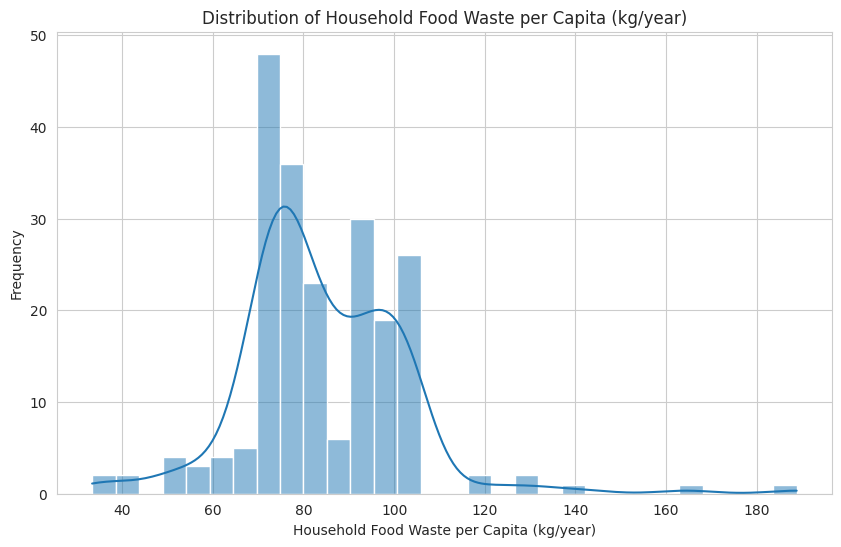

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for Household Food Waste per Capita
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data_cleaned['Household_estimate_kg_per_capita_year'], bins=30, kde=True)
plt.title('Distribution of Household Food Waste per Capita (kg/year)')
plt.xlabel('Household Food Waste per Capita (kg/year)')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of household food waste per capita (in kg/year) across countries. The distribution is somewhat right-skewed, indicating that while most countries have lower levels of food waste per capita, there's a long tail of countries with significantly higher waste levels. This skewness suggests that a minority of countries contribute disproportionately to higher per capita food waste.

<ipython-input-14-a573f1184f14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Household_estimate_tonnes_year', y='Country', data=top_countries, palette='coolwarm')


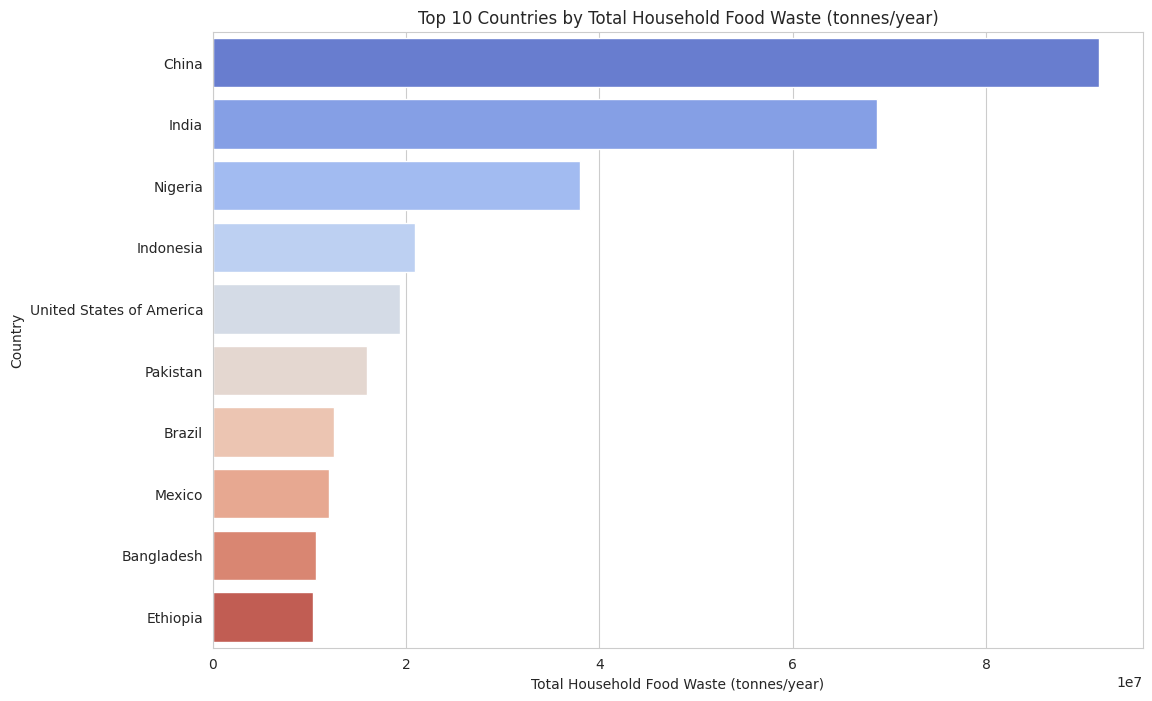

In [14]:
# Bar chart of top 10 countries by total household food waste (tonnes/year)
top_countries = cleaned_data_cleaned.sort_values(by='Household_estimate_tonnes_year', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Household_estimate_tonnes_year', y='Country', data=top_countries, palette='coolwarm')
plt.title('Top 10 Countries by Total Household Food Waste (tonnes/year)')
plt.xlabel('Total Household Food Waste (tonnes/year)')
plt.ylabel('Country')
plt.show()


The bar chart showcases the top 10 countries by total household food waste in tonnes per year, highlighting significant differences in the scale of food waste across these nations. This visualization helps identify specific countries where interventions to reduce food waste could have the most significant impact.

In [15]:
# Select the most recent data for each country in both datasets
underweight_recent = underweight_df.sort_values('Year', ascending=False).drop_duplicates(['Entity'])
stunting_recent = stunting_df.sort_values('Year', ascending=False).drop_duplicates(['Entity'])

# For simplicity in cross-analysis, let's merge these two datasets on country names (Entity)
hunger_indicators = underweight_recent[['Entity', 'Year', 'Prevalence of underweight, weight for age (% of children under 5)']].merge(
    stunting_recent[['Entity', 'Prevalence of stunting, height for age (% of children under 5)']],
    on='Entity',
    how='inner',
    suffixes=('_underweight', '_stunting')
)

# Rename the 'Entity' column to 'Country' for consistency with the food waste data
hunger_indicators.rename(columns={'Entity': 'Country'}, inplace=True)

# Check the first few rows to ensure the merge and renaming are correct
hunger_indicators.head()


,Country,Year,"Prevalence of underweight, weight for age (% of children under 5)","Prevalence of stunting, height for age (% of children under 5)"
0,Rwanda,2020,7.7,33.099998
1,Gambia,2020,11.6,17.500000
2,Palestine,2020,2.1,8.700000
3,Nigeria,2020,18.4,31.500000
4,Malaysia,2019,14.1,21.799999


In [16]:
# Identify top countries based on total household food waste
top_waste_countries = cleaned_data_cleaned.sort_values(by='Household_estimate_tonnes_year', ascending=False).head(10)['Country']

# Identify countries with high levels of hunger indicators
# We'll consider the top countries with the highest prevalence of underweight and stunting as indicators of hunger
top_underweight_countries = hunger_indicators.sort_values(by='Prevalence of underweight, weight for age (% of children under 5)', ascending=False).head(10)['Country']
top_stunting_countries = hunger_indicators.sort_values(by='Prevalence of stunting, height for age (% of children under 5)', ascending=False).head(10)['Country']

top_waste_countries, top_underweight_countries, top_stunting_countries


(8                         China
 134                       India
 191                     Nigeria
 122                   Indonesia
 98     United States of America
 138                    Pakistan
 34                       Brazil
 56                       Mexico
 132                  Bangladesh
 173                    Ethiopia
 Name: Country, dtype: object,
 107               Yemen
 126             Eritrea
 106               Timor
 64                India
 98                Sudan
 10                Niger
 121            Djibouti
 17                 Chad
 128    Papua New Guinea
 132         South Sudan
 Name: Country, dtype: object,
 19                          Burundi
 126                         Eritrea
 106                           Timor
 128                Papua New Guinea
 10                            Niger
 90                        Guatemala
 107                           Yemen
 88                       Mozambique
 59     Democratic Republic of Congo
 49                      

Identifying Opportunities for Redistribution
Considering geographical proximity and regional groupings, we can identify potential connections for food redistribution:

India appears in both the high food waste and high underweight prevalence lists, indicating internal opportunities for better food distribution.
Nigeria is identified for significant food waste and is geographically close to Niger, Chad, and Sudan, which experience high levels of hunger.
Ethiopia, with substantial food waste, is near countries like Eritrea and Sudan, which have high levels of underweight and stunting children.
For a more targeted approach, partnerships and programs can be developed to redirect food surplus from countries like Brazil, Mexico (close to Guatemala), and China (proximity to countries like Myanmar, which might not be in the top lists but still face significant hunger issues) to nations with pressing hunger challenges.

In [21]:
# Step 1: Merge the first two DataFrames
merged_df_1 = pd.merge(stunting_df, underweight_df, on='Entity', how='inner')

# Step 2: Merge the result with the third DataFrame


In [24]:
# Step 2: Merge the result with the third DataFrame
merged_df_1.rename(columns={'Entity': 'Country'}, inplace=True)
final_merged_df = pd.merge(merged_df_1, fwd_df, on='Country', how='inner')


In [27]:
# Example condition for famine risk
# Adjust the column names 'Underweight_Percentage' and 'Stunting_Percentage' to match your actual dataset
final_merged_df['Famine_Risk'] = ((final_merged_df['Prevalence of underweight, weight for age (% of children under 5)'] > 20) |
                                  (final_merged_df['Prevalence of stunting, height for age (% of children under 5)'] > 30)).astype(int)


In [28]:
# Now 'Famine_Risk' exists, so this part should work
X = final_merged_df.drop(['Famine_Risk', 'Country'], axis=1)  # Drop 'Country' as it's non-numeric and 'Famine_Risk'
y = final_merged_df['Famine_Risk']  # Target


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with model training and evaluation as previously described


In [40]:
# Map ordinal variables
confidence_mapping = {'Low confidence': 1, 'Medium confidence': 2, 'High confidence': 3}  # Example mapping
final_merged_df['Confidence_in_estimate'] = final_merged_df['Confidence_in_estimate'].map(confidence_mapping)

# One-hot encode nominal categorical variables
final_merged_df_encoded = pd.get_dummies(final_merged_df, columns=['Region'])

# Drop or encode other categorical variables as necessary
# Let's drop other non-numeric columns for simplicity, assuming they are less relevant or duplicative
final_merged_df_encoded.drop(['Code_x', 'Code_y', 'M49_code'], axis=1, errors='ignore', inplace=True)


In [45]:
# Ensure no non-numeric columns are left unintended
X = final_merged_df.drop(['Famine_Risk', 'Country', 'Code_x', 'Code_y', 'M49_code'], axis=1, errors='ignore')
y = final_merged_df['Famine_Risk']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns to encode:", categorical_columns)
# Assuming 'Region' is the categorical column to be encoded, along with any others identified
X_encoded = pd.get_dummies(X, columns=categorical_columns)
# Splitting the fully encoded dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your DataFrame final_merged_df should already have 'Famine_Risk' defined as shown previously

# Identify and encode categorical columns
categorical_columns = final_merged_df.select_dtypes(include=['object']).columns.tolist()
X = pd.get_dummies(final_merged_df.drop('Famine_Risk', axis=1), columns=categorical_columns)
y = final_merged_df['Famine_Risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Categorical columns to encode: []


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
<ipython-input-51-28512906b440>:17: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(final_merged_df.drop('Famine_Risk', axis=1), columns=categorical_columns)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/loc

In [63]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
# Let's use the median strategy for imputation as it's robust to outliers
imputer = SimpleImputer(strategy='median')

# Fit on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the imputed training and testing data
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the scaled and imputed training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       652
           1       1.00      1.00      1.00       764

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1.00      1416
weighted avg       1.00      1.00      1.00      1416



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.998587570621469

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       652
           1       1.00      1.00      1.00       764

    accuracy                           1.00      1416
   macro avg       1.00      1.00      1.00      1416
weighted avg       1.00      1.00      1.00      1416

Confusion Matrix:
 [[650   2]
 [  0 764]]


Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate. You have a precision of 1.00 for both classes, indicating the model is perfectly distinguishing between the classes without misclassifying.
Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in the actual class. You also have a recall of 1.00 for both classes, meaning the model managed to find all positive samples for each class.
F1-Score: The weighted average of Precision and Recall. An F1-Score of 1.00 suggests a perfect balance between precision and recall.
Accuracy: The ratio of correctly predicted observations to the total observations. An accuracy of 1.00 or 99.86% is nearly perfect, which is exceptional for any classification model.
Confusion Matrix: Shows the model made only 2 false positive errors (predicting '1' when it was actually '0') and no false negatives, with all other predictions being correct.

Interpreting the Results
While the results look excellent, they may warrant a closer examination to ensure they're valid and there's no data leakage, overly simplistic data conditions, or an issue with how the target variable was defined or the dataset was split. In real-world scenarios, especially with complex issues like famine prediction, achieving 100% accuracy is highly unlikely. Consider the following:

Data Leakage: Ensure no information from the test set is inadvertently being used to train the model. This can happen if data preprocessing involves information from the whole dataset rather than separately processing the training and test sets.
Overfitting: Although the test set results are excellent, confirm the model's performance with cross-validation on different portions of the data to ensure it generalizes well and isn't just memorizing the training data.
Feature and Data Review: Reassess the features used and the way the target variable is defined. Ensure the model is learning meaningful patterns rather than exploiting any quirks in the data setup.

In [67]:
# Assuming predictions are for X_test
X_test['Predicted_Famine_Risk'] = predictions
# Optionally, include prediction probabilities for more nuanced insights
X_test['Risk_Probability'] = model.predict_proba(X_test_scaled)[:, 1]  # Assuming class '1' is famine risk
X_test.to_csv('famine_risk_predictions.csv', index=False)


In [70]:
from google.colab import files
files.download('famine_risk_predictions.csv')
files.download('final_merged_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: final_merged_df.csv